In [1]:
import pdfplumber
import pandas as pd
import re

## Exploración y preparación de los datos

In [2]:
# Open the PDF file
with pdfplumber.open('GM_LISTA_MAYO_INTENSIVO.pdf') as pdf:
    for page in pdf.pages:
        tables = page.extract_table()
        print(tables)

[['Nº', 'Nombre del Estudiante', 'DEPARTAMENT\nO', 'TOTAL\nGENERAL', 'DOCENTE', 'NIVEL', 'ACTIVIDADES', 'CONTINUIDAD', 'MODALIDAD'], ['1', 'ALBANY MADELINE GARCIA MONASTERIOS', 'La Paz', '81', 'MARIAN', 'INTERMEDIO', 'COMPLETO -11', 'CONGELAR - TRABAJO', 'INTENSIVO'], ['2', 'ALICIA MAMANI QUISPE', 'La Paz', '75', 'MARIA', 'PRINCIPIANTE', '0- INCOMPLETO', 'CONGELAR - TRABAJO', 'INTENSIVO'], ['3', 'ALVARO WILCARANI CHAMBI', 'Oruro', '76', 'LOURDES', 'INTERMEDIO', '0- INCOMPLETO', 'NO SE PRESENTO', 'INTENSIVO'], ['4', 'AMEL RUDDY VASQUEZ SANJINES', 'La Paz', '95', 'ERIKA', 'PRINCIPIANTE', 'COMPLETO -14', 'CONTINUAR', 'INTENSIVO'], ['5', 'ANA NELY QUISPE QUISPE', 'La Paz', '104', 'NICOLAS', 'PRINCIPIANTE', 'COMPLETO - 11', 'CONTINUAR', 'INTENSIVO'], ['6', 'ANA RAQUEL QUELCA CADENA', 'Cochabamba', '97', 'HELEN', 'BASICO', '4- INCOMPLETO', 'CONTINUAR', 'INTENSIVO'], ['7', 'ANA ROXANA CABALLERO MARQUEZ', 'Sucre', '88', 'NICOLAS', 'PRINCIPIANTE', 'COMPLETO -12', 'CONTINUAR', 'INTENSIVO'], ['8'

In [3]:
# Extracción
pdf = 'GM_LISTA_MAYO_INTENSIVO.pdf'

def extract_table(path_pdf: str, page: int): 
    with pdfplumber.open(path_pdf) as pdf:
        pagina = pdf.pages[page]
        tabla = pagina.extract_table()
    return tabla

tabla_1 = extract_table(pdf, 0)
tabla_2 = extract_table(pdf, 1)
# Se convierte la tabla en un DataFrame
df_1 = pd.DataFrame(tabla_1[1:], columns=tabla_1[0])
df_2 = pd.DataFrame(tabla_2[0:], columns=tabla_1[0])

df_1.head()

,Nº,Nombre del Estudiante,DEPARTAMENT\nO,TOTAL\nGENERAL,DOCENTE,NIVEL,ACTIVIDADES,CONTINUIDAD,MODALIDAD
0,1,ALBANY MADELINE GARCIA MONASTERIOS,La Paz,81,MARIAN,INTERMEDIO,COMPLETO -11,CONGELAR - TRABAJO,INTENSIVO
1,2,ALICIA MAMANI QUISPE,La Paz,75,MARIA,PRINCIPIANTE,0- INCOMPLETO,CONGELAR - TRABAJO,INTENSIVO
2,3,ALVARO WILCARANI CHAMBI,Oruro,76,LOURDES,INTERMEDIO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
3,4,AMEL RUDDY VASQUEZ SANJINES,La Paz,95,ERIKA,PRINCIPIANTE,COMPLETO -14,CONTINUAR,INTENSIVO
4,5,ANA NELY QUISPE QUISPE,La Paz,104,NICOLAS,PRINCIPIANTE,COMPLETO - 11,CONTINUAR,INTENSIVO


In [4]:
df_2.tail()

,Nº,Nombre del Estudiante,DEPARTAMENT\nO,TOTAL\nGENERAL,DOCENTE,NIVEL,ACTIVIDADES,CONTINUIDAD,MODALIDAD
49,144,VERONICA CACERES SILVESTRE,Cochabamba,88,LOURDES,INTERMEDIO,COMPLETO,CONTINUAR,INTENSIVO
50,145,VICTOR ANTONIO ZURITA BORJA,Cochabamba,89,RUTH,BASICO,0- INCOMPLETA,CONGELAR - TRABAJO,INTENSIVO
51,146,VICTOR EDUARDO JIMÉNEZ MARTÍNEZ,Tarija,90,ERIKA,PRINCIPIANTE,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
52,147,YANIRA MILENCA ESTRADA BERRIOS,La Paz,87,RUTH,BASICO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
53,148,YOCELIN MIRIAM FLORES FLORES,La Paz,83,RUTH,BASICO,2- INCOMPLETO,CONTINUAR,INTENSIVO


In [5]:
df_total = pd.concat([df_1, df_2], ignore_index=True)
df_total

,Nº,Nombre del Estudiante,DEPARTAMENT\nO,TOTAL\nGENERAL,DOCENTE,NIVEL,ACTIVIDADES,CONTINUIDAD,MODALIDAD
0,1,ALBANY MADELINE GARCIA MONASTERIOS,La Paz,81,MARIAN,INTERMEDIO,COMPLETO -11,CONGELAR - TRABAJO,INTENSIVO
1,2,ALICIA MAMANI QUISPE,La Paz,75,MARIA,PRINCIPIANTE,0- INCOMPLETO,CONGELAR - TRABAJO,INTENSIVO
2,3,ALVARO WILCARANI CHAMBI,Oruro,76,LOURDES,INTERMEDIO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
3,4,AMEL RUDDY VASQUEZ SANJINES,La Paz,95,ERIKA,PRINCIPIANTE,COMPLETO -14,CONTINUAR,INTENSIVO
4,5,ANA NELY QUISPE QUISPE,La Paz,104,NICOLAS,PRINCIPIANTE,COMPLETO - 11,CONTINUAR,INTENSIVO
...,...,...,...,...,...,...,...,...,...
143,144,VERONICA CACERES SILVESTRE,Cochabamba,88,LOURDES,INTERMEDIO,COMPLETO,CONTINUAR,INTENSIVO
144,145,VICTOR ANTONIO ZURITA BORJA,Cochabamba,89,RUTH,BASICO,0- INCOMPLETA,CONGELAR - TRABAJO,INTENSIVO
145,146,VICTOR EDUARDO JIMÉNEZ MARTÍNEZ,Tarija,90,ERIKA,PRINCIPIANTE,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
146,147,YANIRA MILENCA ESTRADA BERRIOS,La Paz,87,RUTH,BASICO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO


## Limpieza de datos

In [6]:
df_total.shape

(148, 9)

In [7]:
df_total.columns

Index(['Nº', 'Nombre del Estudiante', 'DEPARTAMENT\nO', 'TOTAL\nGENERAL',
       'DOCENTE', 'NIVEL', 'ACTIVIDADES', 'CONTINUIDAD', 'MODALIDAD'],
      dtype='object')

In [8]:
# corrigiendo el nombre de las columnas
df_total.columns = (
    df_total.columns
    .str.lower()
    .str.replace('\n', '')
    .str.replace(' ', '_') 
)
df_total.columns

Index(['nº', 'nombre_del_estudiante', 'departamento', 'totalgeneral',
       'docente', 'nivel', 'actividades', 'continuidad', 'modalidad'],
      dtype='object')

In [9]:
df_total

,nº,nombre_del_estudiante,departamento,totalgeneral,docente,nivel,actividades,continuidad,modalidad
0,1,ALBANY MADELINE GARCIA MONASTERIOS,La Paz,81,MARIAN,INTERMEDIO,COMPLETO -11,CONGELAR - TRABAJO,INTENSIVO
1,2,ALICIA MAMANI QUISPE,La Paz,75,MARIA,PRINCIPIANTE,0- INCOMPLETO,CONGELAR - TRABAJO,INTENSIVO
2,3,ALVARO WILCARANI CHAMBI,Oruro,76,LOURDES,INTERMEDIO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
3,4,AMEL RUDDY VASQUEZ SANJINES,La Paz,95,ERIKA,PRINCIPIANTE,COMPLETO -14,CONTINUAR,INTENSIVO
4,5,ANA NELY QUISPE QUISPE,La Paz,104,NICOLAS,PRINCIPIANTE,COMPLETO - 11,CONTINUAR,INTENSIVO
...,...,...,...,...,...,...,...,...,...
143,144,VERONICA CACERES SILVESTRE,Cochabamba,88,LOURDES,INTERMEDIO,COMPLETO,CONTINUAR,INTENSIVO
144,145,VICTOR ANTONIO ZURITA BORJA,Cochabamba,89,RUTH,BASICO,0- INCOMPLETA,CONGELAR - TRABAJO,INTENSIVO
145,146,VICTOR EDUARDO JIMÉNEZ MARTÍNEZ,Tarija,90,ERIKA,PRINCIPIANTE,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO
146,147,YANIRA MILENCA ESTRADA BERRIOS,La Paz,87,RUTH,BASICO,0- INCOMPLETO,NO SE PRESENTO,INTENSIVO


In [10]:
df_total.isnull().sum()

nº                       0
nombre_del_estudiante    0
departamento             0
totalgeneral             0
docente                  0
nivel                    0
actividades              0
continuidad              0
modalidad                0
dtype: int64

* No se tienen valores nulos o faltantes

In [11]:
df_total.duplicated().sum() # revision de valores duplicados

0

In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   nº                     148 non-null    object
 1   nombre_del_estudiante  148 non-null    object
 2   departamento           148 non-null    object
 3   totalgeneral           148 non-null    object
 4   docente                148 non-null    object
 5   nivel                  148 non-null    object
 6   actividades            148 non-null    object
 7   continuidad            148 non-null    object
 8   modalidad              148 non-null    object
dtypes: object(9)
memory usage: 10.5+ KB


In [13]:
cols_categories = ['departamento', 'docente', 'nivel', 'actividades', 'continuidad', 'modalidad']

In [14]:
# revision de los valores categoricos presentes en cada columna, revision de espacios o caracteres
for col in cols_categories:
    print(col+":")
    print(df_total[col].unique())
    print("-"*70)

departamento:
['La Paz' 'Oruro' 'Cochabamba' 'Sucre' 'Santa Cruz' 'Potosí' 'Tarija'
 'Beni']
----------------------------------------------------------------------
docente:
['MARIAN' 'MARIA' 'LOURDES' 'ERIKA' 'NICOLAS' 'HELEN' 'RUTH']
----------------------------------------------------------------------
nivel:
['INTERMEDIO' 'PRINCIPIANTE' 'BASICO']
----------------------------------------------------------------------
actividades:
['COMPLETO -11' '0- INCOMPLETO' 'COMPLETO -14' 'COMPLETO - 11'
 '4- INCOMPLETO' 'COMPLETO -12' '' '1- INCOMPLETO' '8- INCOMPLETO'
 'COMPLETO' '3-INCOMPLETO' '6- INCOMPLETO' 'COMPLETO - 12' '2- INCOMPLETO'
 '7- INCOMPLETO' 'COMPLETO -10' 'COMPLETO -13' 'COMPLETO-11'
 '5- INCOMPLETO' '6-INCOMPLETO' 'COMPLETO -19' '2-INCOMPLETO'
 '1-INCOMPLETO' 'COMPLETO-12' 'COMPLETO-10' '8-INCOMPLETO' 'INCOMPLETO'
 '4-INCOMPLETO' '7- INCOMPLETO0' '7-INCOMPLETO' '5-INCOMPLETO' 'COMPLETAS'
 '3- INCOMPLETO' 'COMPLETO - 10' 'COMPLETO-14' '0- INCOMPLETA'
 '6- INCOMPLETA' '2- INCOM

In [15]:
# Verificación de nulos despues de la conversion a enteros
pd.to_numeric(df_total.totalgeneral, errors='coerce').isnull().sum() # no hay valores nulos en la columna de calificación

0

In [16]:
# Se filtran las cadenas para detectar palabras distintas de COMPLETO e INCOMPLETO para poder tratarlas.
for s in df_total.actividades.unique():
    if not re.search(r'\b(COMPLETO|INCOMPLETO)\b', s):
        print(s)


7- INCOMPLETO0
COMPLETAS
0- INCOMPLETA
6- INCOMPLETA
2- INCOMPLETA


In [ ]:
def extract_num(actividad): 
    if 'COMPLETO' == actividad: # solamente 'completo' == 9
        return 9
    numeros = re.findall(r'\d+', actividad)
    return int(numeros[0]) if numeros else 0

# Funcion de limpieza y tratamiento del conjunto de datos
def tweak_df(df_total):
    return (
    df_total
    .assign(
        totalgeneral=pd.to_numeric(df_total.totalgeneral, errors='coerce'),
        actividades=lambda df: (df.actividades
                                .str.strip()
                                .str.replace('COMPLETAS', 'COMPLETO', regex=False)
                                .str.replace('INCOMPLETO0', 'INCOMPLETO', regex=False)
                                .str.replace('INCOMPLETA', 'INCOMPLETO', regex=False)
                                .replace('', 'SIN INFORMACION', regex=False)
                               )
    )
    .assign(
        estado_actividades=lambda df: df.actividades.apply(
            lambda x: 'INCOMPLETO' if 'INCOMPLETO' in x else 'COMPLETO'
        ),
        n_actividades=lambda df: df.actividades.apply(extract_num),
        continuidad=lambda df: (df.continuidad
                                .str.replace(r'\s*-\s*', ' - ', regex=True) # Se normaliza el uso del guion, para evitar repetir categorias
                                .replace({
                                    'POR DEFINIR': 'POR CONFIRMAR',
                                    'CONGELAR - HORARIOS': 'CONGELAR - HORARIO',
                                    'CONGELAR - ACADEMICO': 'CONGELAR - ESTUDIO'
                                })
                               ),
        id_estudiante=lambda df: range(1, len(df) + 1), # Anonimización de nombres por seguridad en varios casos
    )
    .astype({'totalgeneral': 'uint8',
             'n_actividades': 'uint8',
             'id_estudiante': 'uint8',
             **{col:'category' for col in ['departamento', 'docente', 'nivel',
               'continuidad', 'modalidad', 'estado_actividades']}
    })
    [['id_estudiante', 'departamento', 'totalgeneral',
    'docente', 'nivel', 'modalidad', 'estado_actividades', 
    'n_actividades', 'continuidad']]
       
    
)

In [18]:
df_clean = tweak_df(df_total)
df_clean

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,1,CONGELAR - TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,COMPLETO,0,CONGELAR - TRABAJO
2,3,Oruro,76,LOURDES,INTERMEDIO,INTENSIVO,COMPLETO,0,NO SE PRESENTO
3,4,La Paz,95,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,1,CONTINUAR
4,5,La Paz,104,NICOLAS,PRINCIPIANTE,INTENSIVO,COMPLETO,1,CONTINUAR
...,...,...,...,...,...,...,...,...,...
143,144,Cochabamba,88,LOURDES,INTERMEDIO,INTENSIVO,COMPLETO,0,CONTINUAR
144,145,Cochabamba,89,RUTH,BASICO,INTENSIVO,COMPLETO,0,CONGELAR - TRABAJO
145,146,Tarija,90,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,0,NO SE PRESENTO
146,147,La Paz,87,RUTH,BASICO,INTENSIVO,COMPLETO,0,NO SE PRESENTO


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id_estudiante       148 non-null    uint8   
 1   departamento        148 non-null    category
 2   totalgeneral        148 non-null    uint8   
 3   docente             148 non-null    category
 4   nivel               148 non-null    category
 5   modalidad           148 non-null    category
 6   estado_actividades  148 non-null    category
 7   n_actividades       148 non-null    uint8   
 8   continuidad         148 non-null    category
dtypes: category(6), uint8(3)
memory usage: 3.2 KB


## Visualización de datos

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_clean.head()

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,1,CONGELAR - TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,COMPLETO,0,CONGELAR - TRABAJO
2,3,Oruro,76,LOURDES,INTERMEDIO,INTENSIVO,COMPLETO,0,NO SE PRESENTO
3,4,La Paz,95,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,1,CONTINUAR
4,5,La Paz,104,NICOLAS,PRINCIPIANTE,INTENSIVO,COMPLETO,1,CONTINUAR


In [22]:
dep_count = (
    df_clean
    .departamento
    .value_counts()
    .reset_index()
    .rename(columns={'index':'departamento',
                    'departamento': 'cantidad'})
)


In [23]:
dep_count

,departamento,cantidad
0,La Paz,71
1,Cochabamba,28
2,Sucre,13
3,Santa Cruz,12
4,Potosí,9
5,Tarija,9
6,Oruro,5
7,Beni,1


In [24]:
sns.set_style("whitegrid")

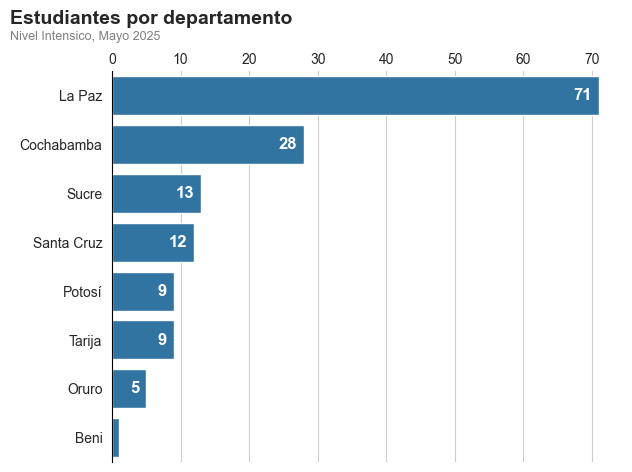

In [25]:
sns.barplot(
    data=dep_count,
    x='cantidad',
    y='departamento',
    order=dep_count.sort_values('cantidad',ascending=False)['departamento'],
    color="#1f77b4"
)
# Titulo
plt.title("Estudiantes por departamento", fontsize=14, loc="left", fontweight="bold", x=-0.2, y=1.1)
plt.ylabel('')
plt.xlabel('')
# Subtítulo 
plt.text(
    x=-0.2, y=1.08,                            
    s="Nivel Intensico, Mayo 2025",
    transform=plt.gca().transAxes,
    fontsize=9,
    color="gray"
)

# Eje X arriba
plt.gca().xaxis.set_ticks_position('top')     # Se mueve los ticks arriba
plt.gca().xaxis.set_label_position('top')     
# Acortar las puntas de los ticks superiores
plt.tick_params(axis='x', which='both', top=True, length=0)

# Se agregan los textos dentro de las barras
for i, bar in enumerate(plt.gca().patches):
    ancho = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(
        x=ancho - 1,                      # Un poco antes del final de la barra
        y=y_pos,
        s=int(ancho),                     # Se muestra el valor como entero
        va='center',                     # Se alinea verticalmente al centro
        ha='right',                      # Se alinea a la derecha
        color='white',                   # Color del texto
        fontweight='bold',
        fontsize='12'
    )

plt.gca().spines['left'].set_color('black')  # Se cambia el color del eje y a negro



sns.despine(bottom=True)
plt.tight_layout()

In [26]:
dep_nivel = pd.crosstab(df_clean['departamento'], df_clean['nivel'])
# Se ordenan los departamentos (por suma total)
dep_nivel_sort = dep_nivel.loc[dep_nivel.sum(axis=1).sort_values().index, ['PRINCIPIANTE','BASICO','INTERMEDIO']]
dep_nivel_sort

nivel,PRINCIPIANTE,BASICO,INTERMEDIO
departamento,,,
Beni,0,1,0
Oruro,1,3,1
Potosí,5,3,1
Tarija,4,2,3
Santa Cruz,7,4,1
Sucre,9,3,1
Cochabamba,10,8,10
La Paz,41,21,9


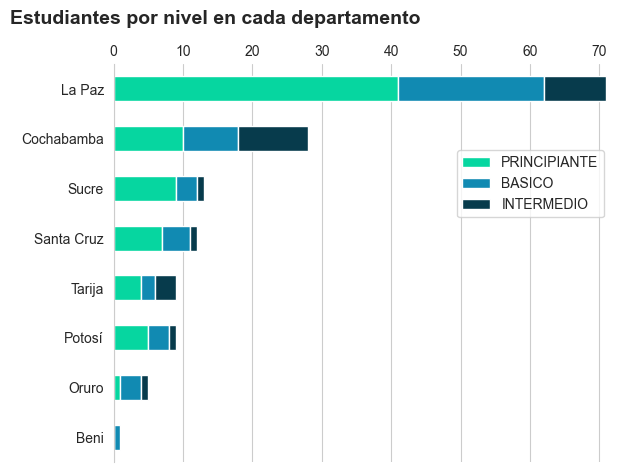

In [27]:
colores = ['#06d6a0', '#118ab2', '#073b4c']

ax = dep_nivel_sort.plot(kind='barh',
                  stacked=True,
                  color=colores,
                 )

plt.title("Estudiantes por nivel en cada departamento", fontsize=14, loc="left", fontweight="bold", x=-0.2, y=1.08)
plt.ylabel('')

# Se elimina la grilla del eje Y (líneas horizontales)
ax.grid(False, axis='y')
# Se elimina el título de la leyenda
ax.legend(
    title="",
    bbox_to_anchor=(0.65, 0.8),
    loc='upper left'
)
# Eje X arriba
plt.gca().xaxis.set_ticks_position('top')     # Se mueve los ticks arriba
plt.gca().xaxis.set_label_position('top')     
# Acortar las puntas de los ticks superiores
plt.tick_params(axis='x', which='both', top=True, length=0)

sns.despine(bottom=True)
plt.tight_layout()
plt.show()

In [28]:
tab_dep_nivel = dep_nivel.loc[dep_nivel.sum(axis=1).sort_values(ascending=False).index]
tab_dep_nivel.loc['Total'] = tab_dep_nivel.sum()
tab_dep_nivel

nivel,BASICO,INTERMEDIO,PRINCIPIANTE
departamento,,,
La Paz,21,9,41
Cochabamba,8,10,10
Sucre,3,1,9
Santa Cruz,4,1,7
Potosí,3,1,5
Tarija,2,3,4
Oruro,3,1,1
Beni,1,0,0
Total,45,26,77


In [29]:
df_clean

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,1,CONGELAR - TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,COMPLETO,0,CONGELAR - TRABAJO
2,3,Oruro,76,LOURDES,INTERMEDIO,INTENSIVO,COMPLETO,0,NO SE PRESENTO
3,4,La Paz,95,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,1,CONTINUAR
4,5,La Paz,104,NICOLAS,PRINCIPIANTE,INTENSIVO,COMPLETO,1,CONTINUAR
...,...,...,...,...,...,...,...,...,...
143,144,Cochabamba,88,LOURDES,INTERMEDIO,INTENSIVO,COMPLETO,0,CONTINUAR
144,145,Cochabamba,89,RUTH,BASICO,INTENSIVO,COMPLETO,0,CONGELAR - TRABAJO
145,146,Tarija,90,ERIKA,PRINCIPIANTE,INTENSIVO,COMPLETO,0,NO SE PRESENTO
146,147,La Paz,87,RUTH,BASICO,INTENSIVO,COMPLETO,0,NO SE PRESENTO


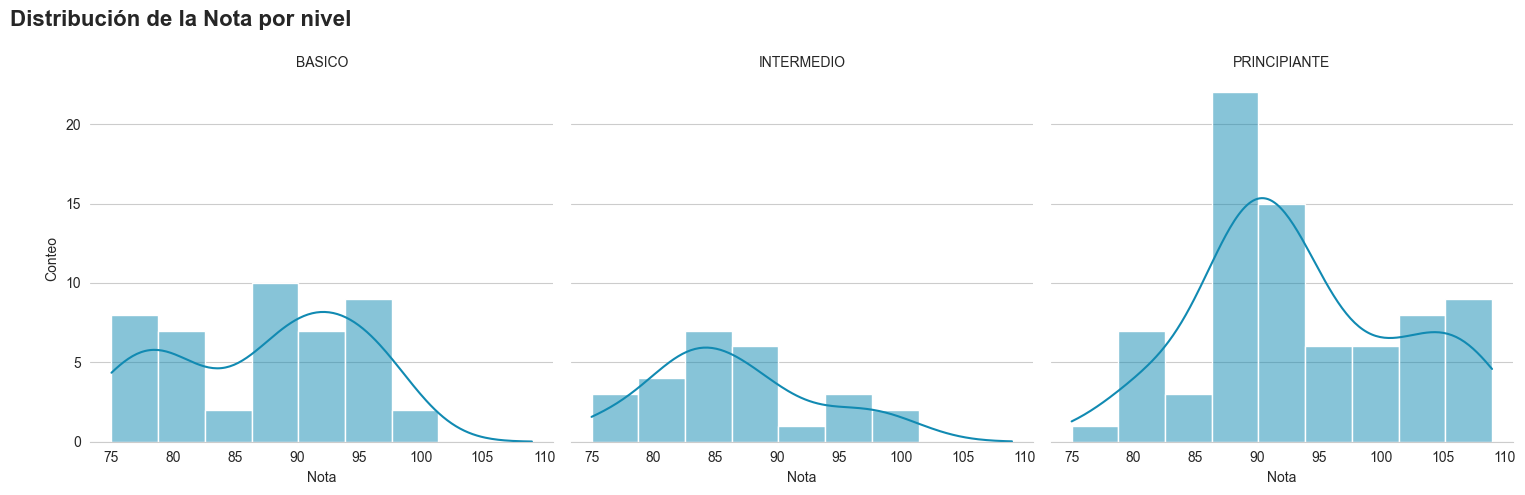

In [30]:
g = sns.displot(data=df_clean, x="totalgeneral",
            kde=True,
            col='nivel',
            color='#118ab2'
           )

# Se agrega el título principal
g.fig.suptitle("Distribución de la Nota por nivel", fontsize=16, fontweight="bold", x=0.1)

# Se ajusta el espacio para que no se sobreponga con los subgráficos
g.fig.subplots_adjust(top=0.85)
# Se accede a cada eje del grid y se desactiva la grilla del eje X
for ax in g.axes.flat:
    ax.grid(False, axis='x')
# Se borra el nombre del eje X en cada subplot
for ax in g.axes.flat:
    ax.set_xlabel('Nota')  # Se elimina el nombre del eje X
    ax.set_ylabel('Conteo')
    
g.set_titles("{col_name}")    
sns.despine(left=True)
plt.show()

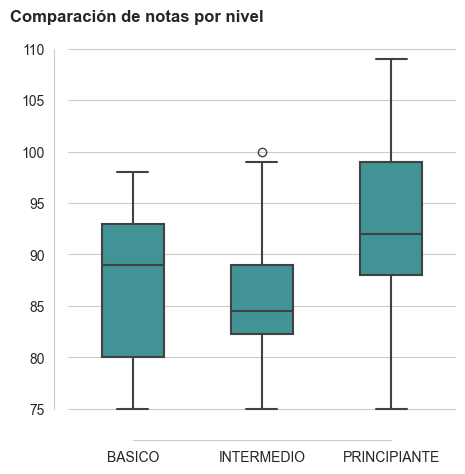

In [31]:

plt.figure(figsize=(5, 5))
ax = sns.boxplot(
    df_clean,
    x='nivel',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5,
    gap=.4
)
plt.title("Comparación de notas por nivel", fontsize=12, loc="left", fontweight="bold", x=-0.15, y=1.03)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

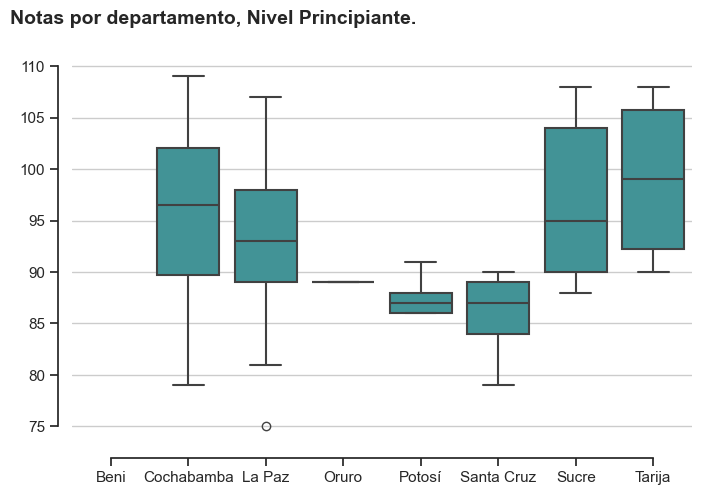

In [32]:
sns.set_theme(style="ticks")
# Tamaño
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    df_clean.query('nivel=="PRINCIPIANTE"'),
    x='departamento',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5,
)
# titulo
plt.title("Notas por departamento, Nivel Principiante.", fontsize=14, loc="left", fontweight="bold", x=-0.1, y=1.07)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

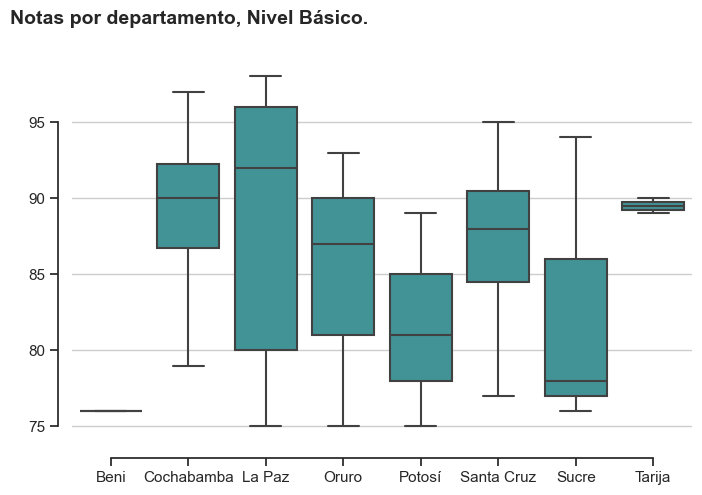

In [33]:
# Tamaño
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    df_clean.query('nivel=="BASICO"'),
    x='departamento',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5
    
)
# titulo
plt.title("Notas por departamento, Nivel Básico.", fontsize=14, loc="left", fontweight="bold", x=-0.1, y=1.07)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

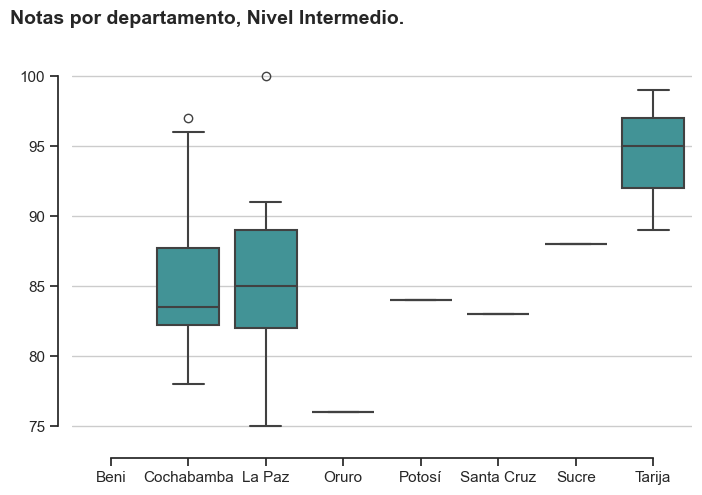

In [34]:
# Tamaño
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    df_clean.query('nivel=="INTERMEDIO"'),
    x='departamento',
    y='totalgeneral',
    color='#34a0a4',
    linewidth=1.5
    
)
# titulo
plt.title("Notas por departamento, Nivel Intermedio.", fontsize=14, loc="left", fontweight="bold", x=-0.1, y=1.07)
plt.ylabel('')
plt.xlabel('')
ax.yaxis.grid(True)
sns.despine(offset=10, trim=True)

In [35]:
pd.crosstab(df_clean.docente, df_clean.nivel)

nivel,BASICO,INTERMEDIO,PRINCIPIANTE
docente,,,
ERIKA,0,0,26
HELEN,20,0,0
LOURDES,0,13,0
MARIA,0,0,30
MARIAN,0,13,0
NICOLAS,0,0,21
RUTH,25,0,0


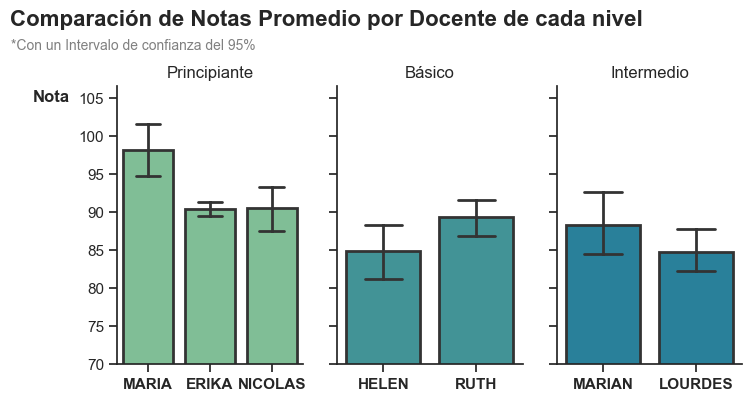

In [36]:
# Se crean 3 subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(7, 4), sharey=True)
colores = ['#76c893', '#34a0a4', '#168aad']
# Barplot 1: por docente
sns.barplot(
    df_clean.query('nivel=="PRINCIPIANTE"').assign(docente=lambda df: df.docente.astype(str)), 
    x="docente", y="totalgeneral",
    errorbar=('ci', 95),
    estimator='mean',
    capsize=.4,
    color=colores[0],
    err_kws={"color": ".2", "linewidth": 2},
    edgecolor=".2",
    linewidth=2,
    ax=axes[0],
)
axes[0].set_title("Principiante")    
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# Barplot 2: por nivel
sns.barplot(
    df_clean.query('nivel=="BASICO"').assign(docente=lambda df: df.docente.astype(str)), 
    x="docente", y="totalgeneral",
    errorbar=('ci', 95),
    estimator='mean',
    capsize=.4,
    color=colores[1],
    err_kws={"color": ".2", "linewidth": 2},
    edgecolor=".2",
    linewidth=2,
    ax=axes[1],
)
axes[1].set_title("Básico")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Barplot 3: por departamento
sns.barplot(
    df_clean.query('nivel=="INTERMEDIO"').assign(docente=lambda df: df.docente.astype(str)), 
    x="docente", y="totalgeneral",
    errorbar=('ci', 95),
    estimator='mean',
    capsize=.4,
    color=colores[2],
    err_kws={"color": ".2", "linewidth": 2},
    edgecolor=".2",
    linewidth=2,
    ax=axes[2],
)
axes[2].set_title("Intermedio")
axes[2].set_xlabel("")
axes[2].set_ylabel("")


for ax in axes:
    # Se les pone en negrita las etiquetas del eje X
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
#Titulo
fig.suptitle("Comparación de Notas Promedio por Docente de cada nivel", fontsize=16, fontweight='bold', x=0.38, y=1)
fig.text(-0.07, 0.9, '*Con un Intervalo de confianza del 95%', fontsize=10, color='gray')


# Eje y, etiqueta
fig.text(-0.04, 0.77, 'Nota', fontsize=12, fontweight='bold')


sns.despine(top=True, right=True)
# Ajuste del diseño para evitar solapamiento
plt.tight_layout()
plt.ylim(70, None)
# Mostrar gráfico
plt.show()


In [37]:
df_clean.estado_actividades.value_counts()

COMPLETO    148
Name: estado_actividades, dtype: int64

* 89 estudiantes tienen riesgo de quedar inhabilitados.

In [38]:
df_clean.estado_actividades.value_counts(normalize=True)*100

COMPLETO    100.0
Name: estado_actividades, dtype: float64

* El 60 % de los estudiantes no completo sus actividades y tienen riesgo de quedar inhabilitados.

C:\Users\aleja\AppData\Local\Temp\ipykernel_24644\4231095495.py:4: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax=sns.countplot(


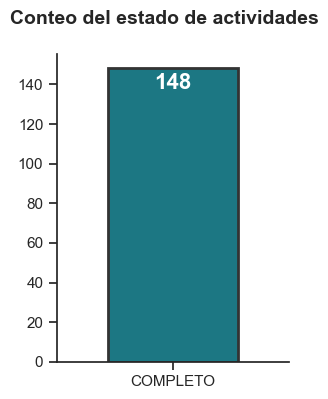

In [39]:
plt.figure(figsize=(3, 4))
colors=['#0B8494','#F05A7E']

ax=sns.countplot(
    df_clean,
    x='estado_actividades',
    hue='estado_actividades',
    linewidth=2,
    edgecolor=".2",
    palette=colors,
    gap=.3,
    
)

# Se agregan los números justo debajo del límite superior de la barra
for p in ax.patches:
    altura = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = altura - 2  # Se coloca ligeramente por debajo del tope de la barra
    ax.text(
        x, y, f'{int(altura)}',
        ha='center', va='top',
        color='white', fontweight='bold', fontsize=16
    )
plt.title("Conteo del estado de actividades", fontsize=14,loc="left", fontweight="bold", x=-0.2, y=1.07 )
sns.despine(top=True, right=True)
plt.xlabel('')
plt.ylabel('')
plt.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_24644\3558529182.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax=sns.countplot(


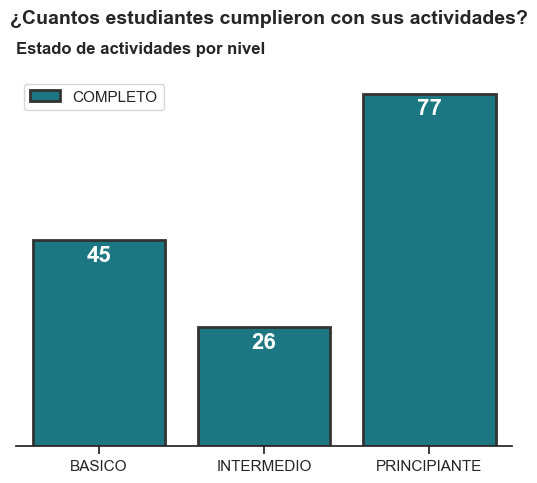

In [40]:
ax=sns.countplot(
    df_clean,
    x='nivel',
    hue='estado_actividades',
    palette=colors,
    linewidth=2,
    edgecolor=".2",
)

# Agregar etiquetas justo debajo del borde superior
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:  # Para evitar errores si alguna barra es cero
        x = p.get_x() + p.get_width() / 2
        y = altura - 1  # Se ajusta el valor vertical
        ax.text(
            x, y, f'{int(altura)}',
            ha='center', va='top',
            color='white', fontweight='bold', fontsize=16
        )

plt.suptitle("¿Cuantos estudiantes cumplieron con sus actividades?", fontsize=14, fontweight='bold', x=0.52,y=1.02)
plt.title("Estado de actividades por nivel ", fontsize=12,loc="left", fontweight="bold", x=-0.0, y=1.04 )

plt.legend(title="")
sns.despine(top=True, right=True)
plt.xlabel('')
plt.ylabel('')

ax.spines['left'].set_visible(False)   # Quita la línea del eje Y (vertical izquierda)
ax.tick_params(axis='y', left=False)   # Quita las marcas (ticks) del eje Y
ax.set_yticklabels([]) 
plt.show()

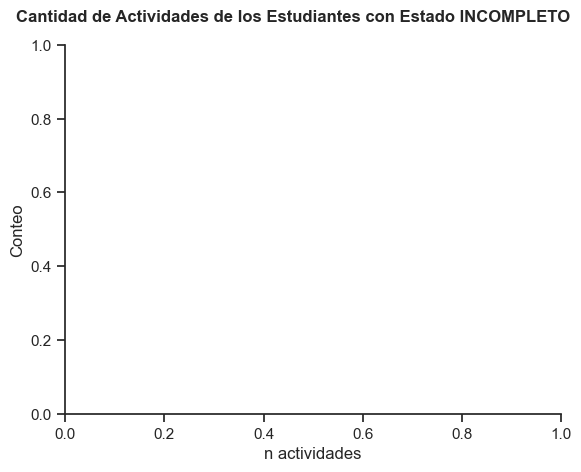

In [41]:
ax = sns.countplot(
    df_clean.query('estado_actividades=="INCOMPLETO"'),
    x='n_actividades',
    color='#F05A7E',
    linewidth=2,
    edgecolor=".2",
)

# Agregar etiquetas justo debajo del borde superior
for p in ax.patches:
    altura = p.get_height()
    if altura > 0:  # Para evitar errores si alguna barra es cero
        x = p.get_x() + p.get_width() / 2
        y = altura - 1  # Se ajusta el valor vertical
        ax.text(
            x, y, f'{int(altura)}',
            ha='center', va='top',
            color='white', fontweight='bold', fontsize=16
        )

plt.title("Cantidad de Actividades de los Estudiantes con Estado INCOMPLETO", fontsize=12,loc="left", fontweight="bold", x=-0.1, y=1.04 )
plt.xlabel('n actividades')
plt.ylabel('Conteo')
sns.despine(top=True, right=True)

* 28 estudiantes no realizaron ninguna actividad.

In [42]:
df_clean.query('estado_actividades=="INCOMPLETO"').n_actividades.value_counts()

Series([], Name: n_actividades, dtype: int64)

In [43]:
# Distribución del número de activades de todos los estudiantes de mayo
df_clean.query('estado_actividades=="INCOMPLETO"').n_actividades.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
n_actividades,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* El 75% de los estudiantes incompletos tienen 6 actividades o menos.

In [44]:
import numpy as np
def continuidad(x):
    if 'CONGELAR' in x:
        return 'CONGELAR'
    if 'RETIRAR' in x:
        return 'RETIRAR'
    return x

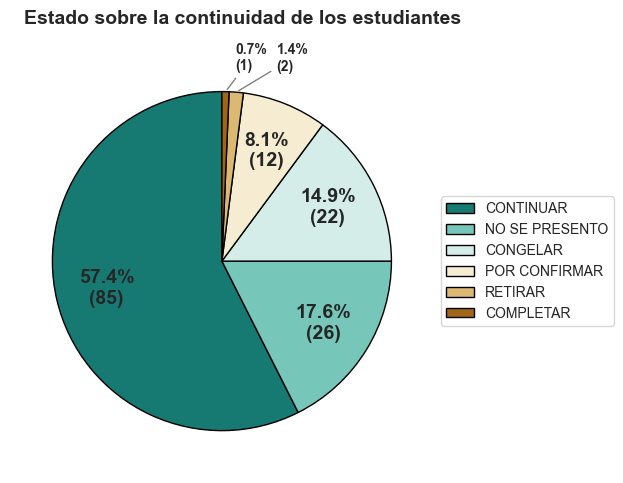

In [45]:
estado_counts = (
    df_clean
    .assign(estado_continuidad=lambda df: df.continuidad.apply(continuidad))
    .estado_continuidad
    .value_counts()
)

labels = estado_counts.index.tolist()
data = estado_counts.values.tolist()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

# Colores personalizados
colors = sns.color_palette("BrBG_r")

# Gráfico de torta SIN autopct
wedges, texts = ax.pie(
    data,
    textprops=dict(color="black", weight="bold"),
    colors=colors,
    startangle=90,
    wedgeprops=dict(linewidth=1, edgecolor='black')
)

# Se define la función para mostrar porcentaje y cantidad
def format_label(pct, total):
    absolute = int(np.round(pct / 100. * total))
    return f"{pct:.1f}%\n({absolute})"

# Total general
total = sum(data)

# Se posicionan manualmente las etiquetas
for i, (wedge, count) in enumerate(zip(wedges, data)):
    angle = (wedge.theta2 + wedge.theta1) / 2.
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    ha = 'left' if x >= 0 else 'right'
    label = format_label(100 * count / total, total)

    if count < 5:
        # Se coloca el texto fuera con flecha
        ax.annotate(
            label,
            xy=(x, y),
            xytext=(3.8 * x, 1.2 * y),
            arrowprops=dict(arrowstyle='-', color='gray'),
            ha=ha, va='center', fontsize=10, fontweight='bold'
        )
    else:
        # Se coloca el texto dentro del segmento
        ax.text(
            0.7 * x,
            0.7 * y,
            label,
            ha='center',
            va='center',
            fontsize=14,
            fontweight='bold'
        )

# Leyenda externa
ax.legend(
    wedges,
    labels,
    title="",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10,
)

# Título
ax.set_title("Estado sobre la continuidad de los estudiantes", fontsize=14, fontweight="bold", x=0.55,y=1.04)

plt.tight_layout()
plt.show()

* El 57.4 % (85) de los estudiantes continuaran con el programa para el siguiente nivel.
* El 15 % (22) de los estudiantes ha decidido congelar el programa.
* El 17.6 % (26) no dieron información de su estado.
* Solo 2 personas se retiran del programa.

In [46]:
(
    df_clean
    .assign(estado_continuidad=lambda df: df.continuidad.apply(continuidad))
    .query('estado_continuidad == "CONGELAR"')
    .assign(motivo=lambda df: df['continuidad'].str.replace(r'^CONGELAR - ', '', regex=True))
).head()

,id_estudiante,departamento,totalgeneral,docente,nivel,modalidad,estado_actividades,n_actividades,continuidad,estado_continuidad,motivo
0,1,La Paz,81,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,1,CONGELAR - TRABAJO,CONGELAR,TRABAJO
1,2,La Paz,75,MARIA,PRINCIPIANTE,INTENSIVO,COMPLETO,0,CONGELAR - TRABAJO,CONGELAR,TRABAJO
16,17,La Paz,75,MARIAN,INTERMEDIO,INTENSIVO,COMPLETO,1,CONGELAR - PREMILITAR,CONGELAR,PREMILITAR
41,42,La Paz,98,HELEN,BASICO,INTENSIVO,COMPLETO,1,CONGELAR - INTERNADO,CONGELAR,INTERNADO
44,45,Sucre,88,MARIA,PRINCIPIANTE,INTENSIVO,COMPLETO,2,CONGELAR - PRACTICAS,CONGELAR,PRACTICAS


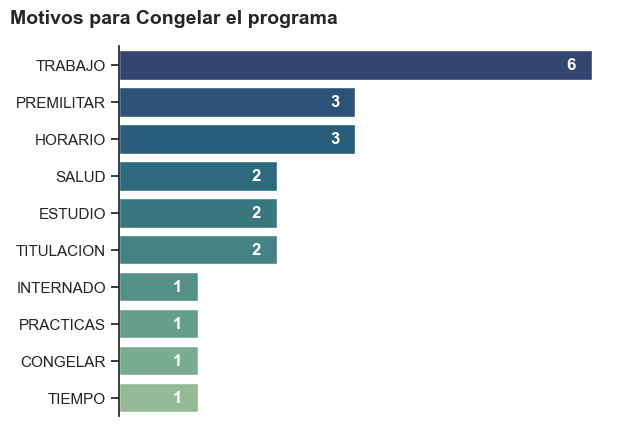

In [47]:
df_congl = (
    df_clean
    .assign(estado_continuidad=lambda df: df.continuidad.apply(continuidad))
    .query('estado_continuidad == "CONGELAR"')
    .assign(motivo=lambda df: df['continuidad'].str.replace(r'^CONGELAR - ', '', regex=True))
)

# Se cuenta la frecuencia de cada categoría
orden = (
    df_congl['motivo']
    .astype(str)
    .value_counts()
    .index
)

# Se redefine la columna como categórica con orden explícito
df_congl = df_congl.assign(
    motivo=lambda df: pd.Categorical(df['motivo'].astype(str), categories=orden, ordered=True)
)

ax=sns.countplot(
    data=df_congl,
    y='motivo',
    hue='motivo',
    palette='crest_r'
)

# Se agregan las etiquetas dentro de cada barra
for p in ax.patches:
    ancho = p.get_width()
    y_pos = p.get_y() + p.get_height() / 2
    ax.text(
        x=ancho - 0.2,  # Se posiciona a la izquierda del borde
        y=y_pos,
        s=int(ancho),
        va='center',
        ha='right',
        fontsize=12,
        fontweight='bold',
        color='white'
    )

# Ocultar eje X y bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)

plt.title("Motivos para Congelar el programa", fontsize=14,loc="left", fontweight="bold", x=-0.22, y=1.04 )
plt.ylabel('')
plt.xlabel('')
plt.show()

* El motivo mas frecuente para congelar el programa es Trabajo.